# Acme-Employee-Attrition-Analysis-and-Prediction(Model Selection With Confusion Matrix and Accuracy)

**HR-Employee-Attrition**

In [1]:
# importing libraries

In [31]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

**DATA PRE-PROCESSING**

$$
DATA-EXPLORATION
$$

In [3]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [4]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [5]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [6]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

**DATA VISUALIZATION**

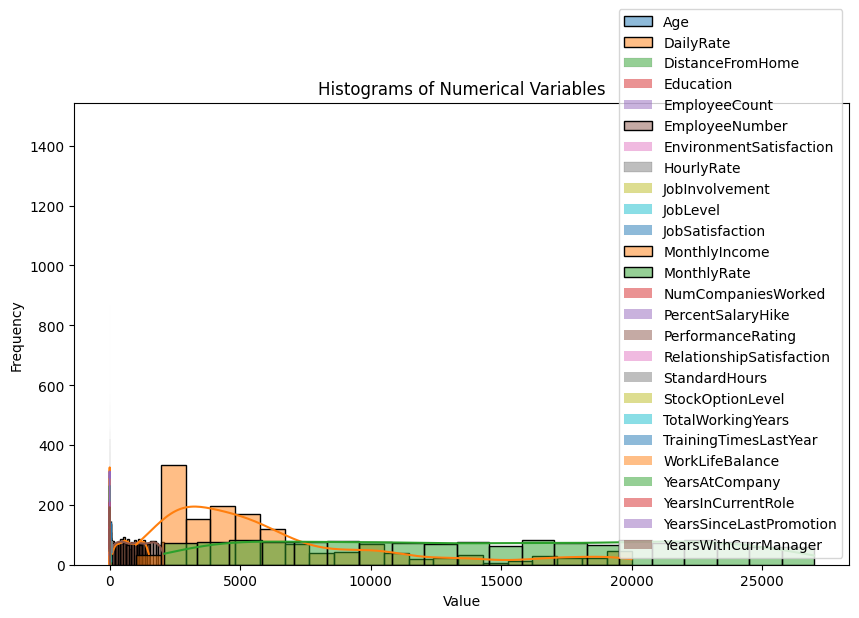

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical variables using histograms
plt.figure(figsize=(10, 6))
for column in df.select_dtypes(include='number').columns:
    sns.histplot(df[column], kde=True, bins=20, alpha=0.5, label=column)
plt.legend()
plt.title('Histograms of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

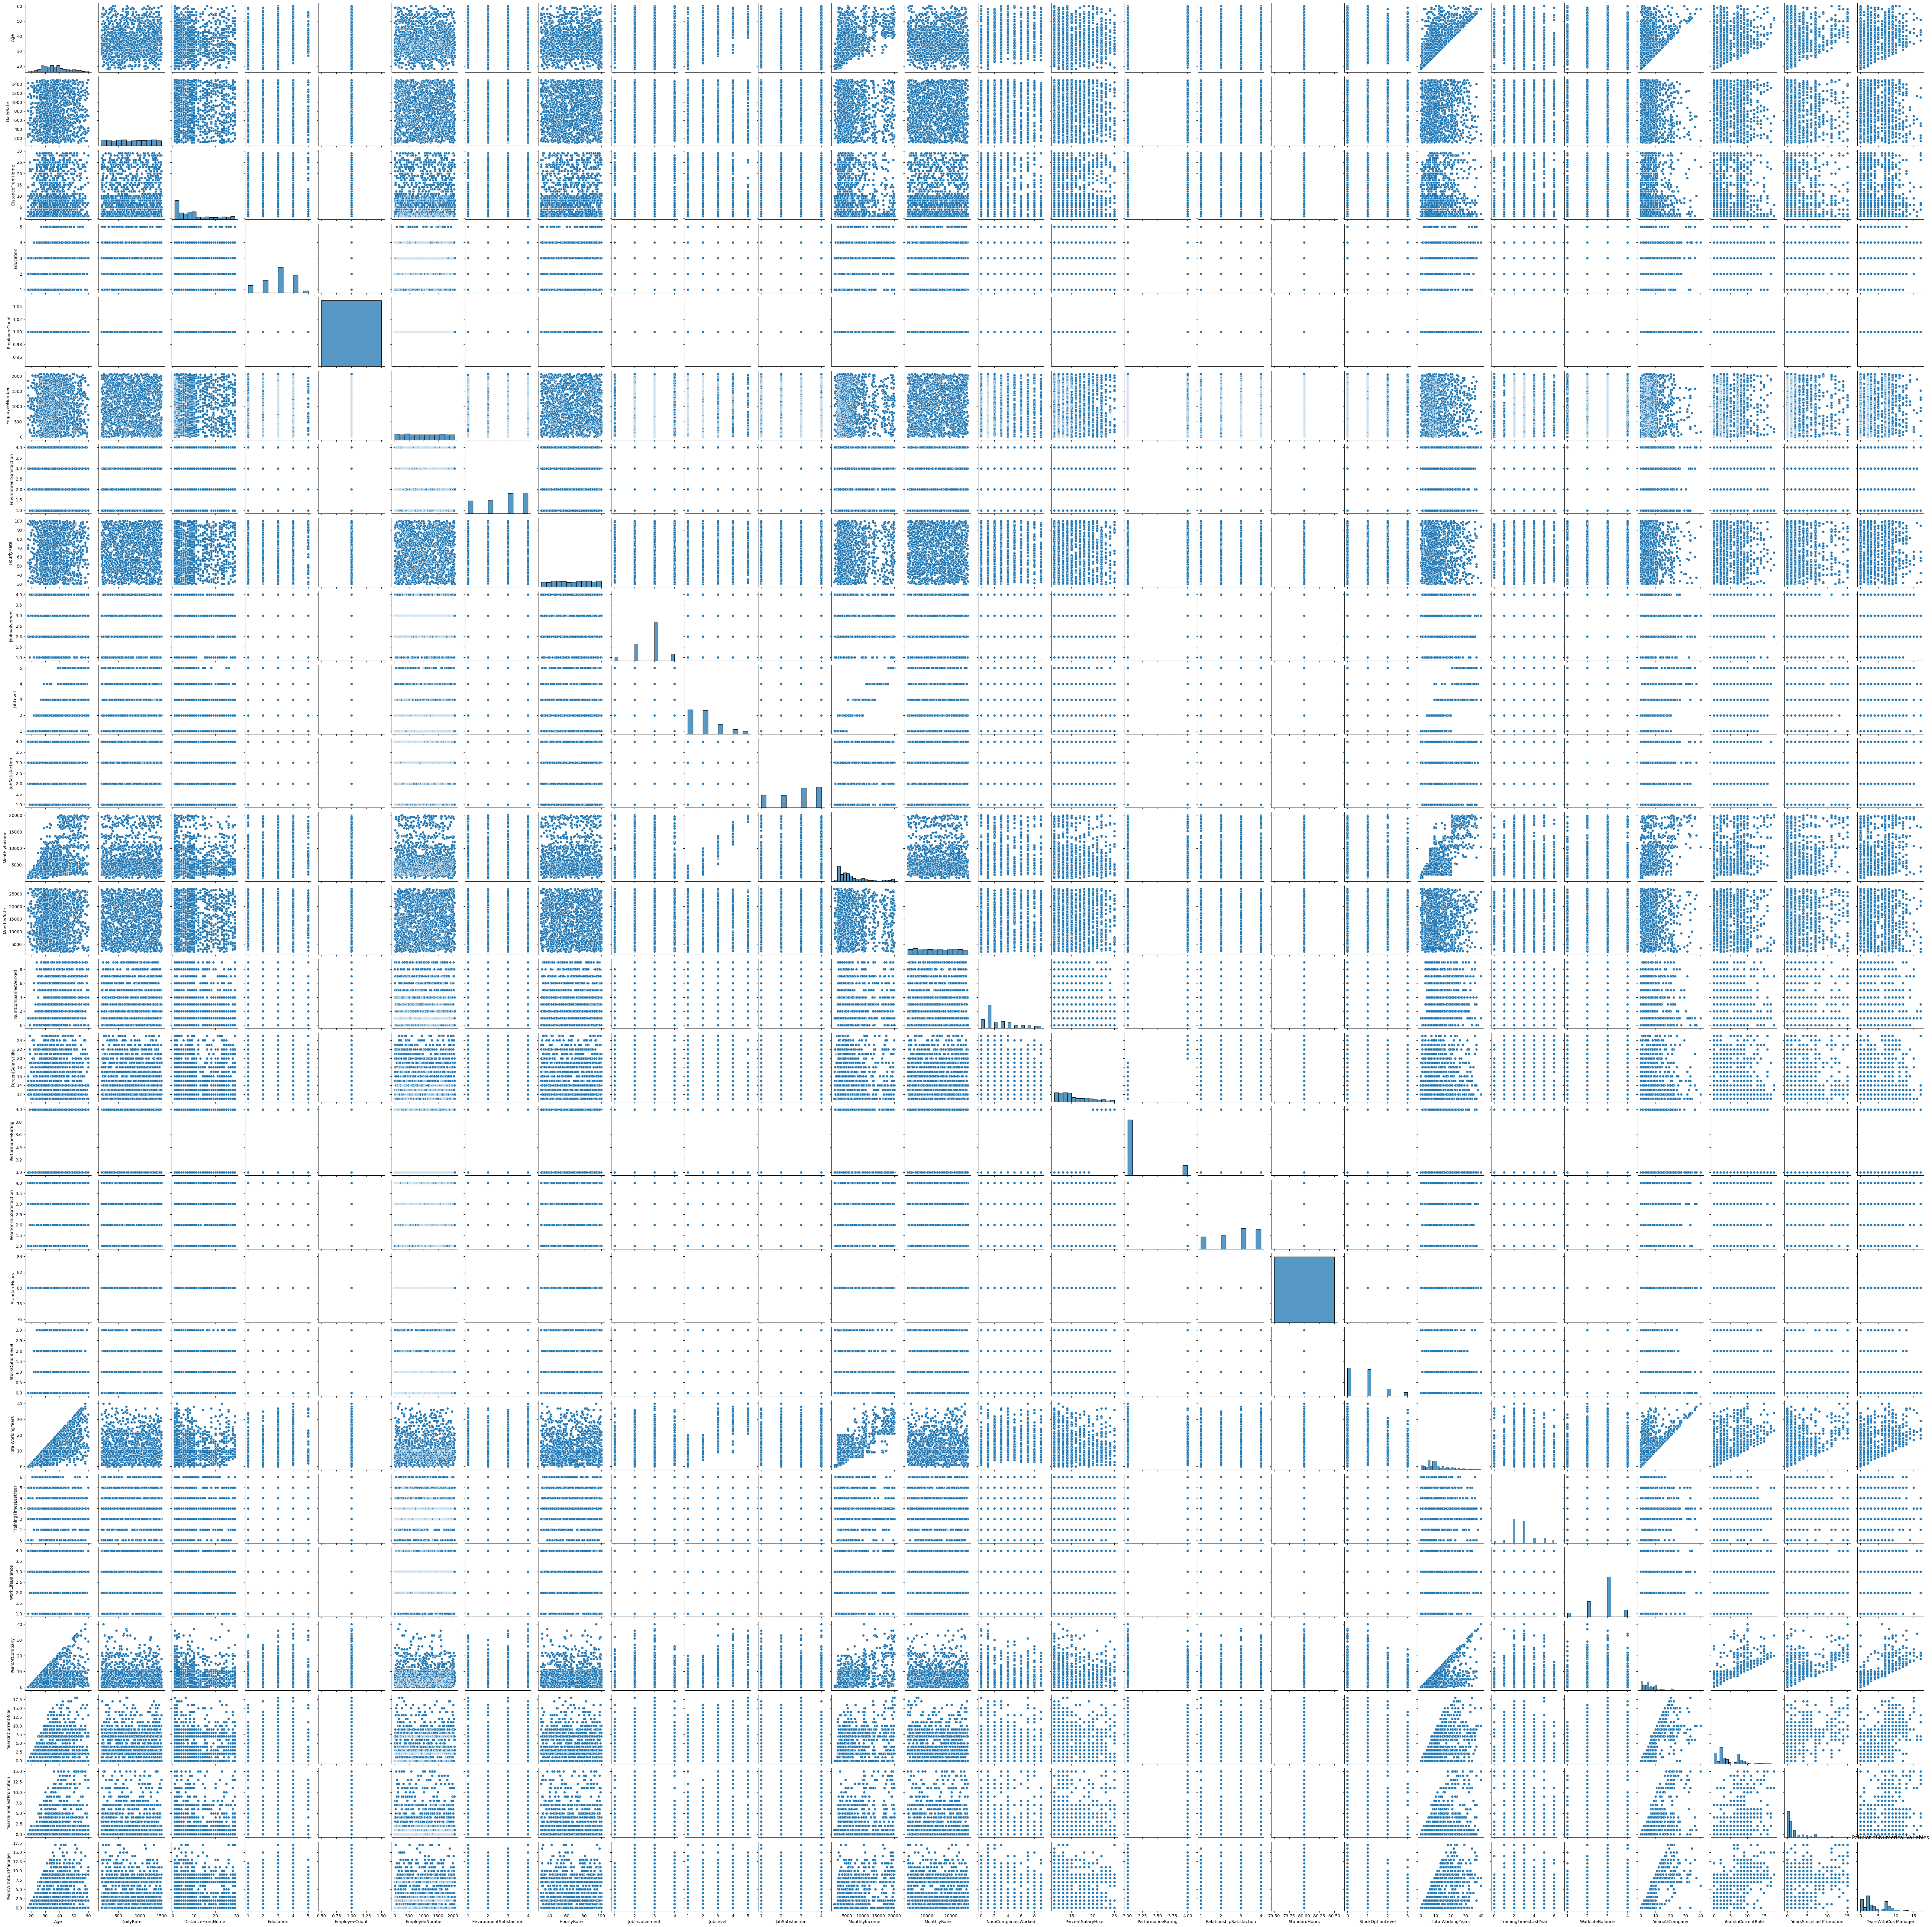

In [11]:
# Visualize relationships between numerical variables using pairplot
sns.pairplot(df)
plt.title('Pairplot of Numerical Variables')
plt.show()

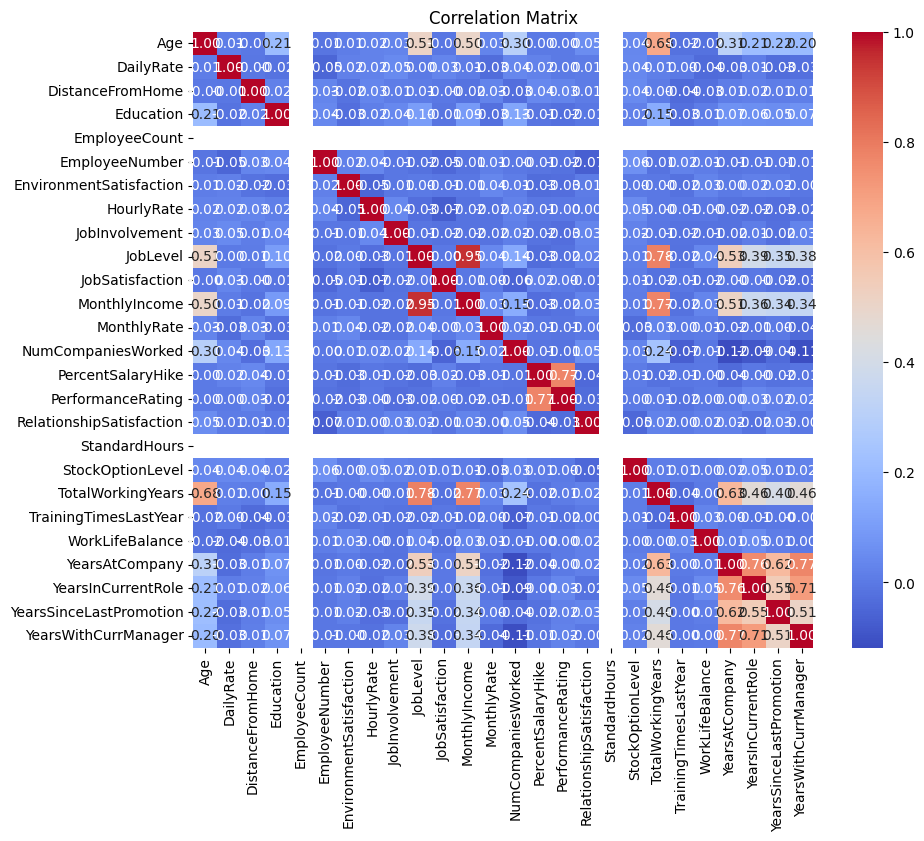

In [12]:
# Exclude non-numeric columns or encode categorical variables
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Visualize correlation matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

**HANDLING NULL VALUES AND DROPING DUPLICATES**

In [14]:
# Handle missing values by removing rows with missing values
df.dropna(inplace=True)

In [15]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [16]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

$$
HANDLING-OUTLIERS-and-STANDERDIZING-NUMERICAL-DATA
$$

In [17]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Remove outliers using z-score or IQR method
# we can choose either z-score or IQR method, or both based on preference and data characteristics.

# Z-score method
#z_scores = stats.zscore(df.select_dtypes(include=['number']))
#abs_z_scores = np.abs(z_scores)
#filtered_entries_z = (abs_z_scores < 3).all(axis=1)  # Define threshold for outlier detection (e.g., 3)
#df = df[filtered_entries_z]

# IQR method
numeric_columns = df.select_dtypes(include=['number']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outlier detection
threshold = 1.5

# Filter out outliers based on IQR
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Apply filter
filtered_entries_iqr = df[numeric_columns].apply(lambda x: (x >= lower_bound[x.name]) & (x <= upper_bound[x.name]))
filtered_entries_iqr = filtered_entries_iqr.all(axis=1)

# Keep only entries that meet the filtering criteria
df = df[filtered_entries_iqr]

# Optional: Standardize numerical data using Min-Max scaling or StandardScaler from scikit-learn

# Example: Min-Max scaling
scaler = MinMaxScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

# Example: StandardScaler from scikit-learn
# scaler = StandardScaler()
# df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

C:\Users\vikra\AppData\Local\Temp\ipykernel_28112\1433154781.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))


In [18]:
df

Age Attrition     BusinessTravel  DailyRate  \
2     0.452381       Yes      Travel_Rarely   0.910394   
3     0.357143        No  Travel_Frequently   0.924014   
5     0.333333        No  Travel_Frequently   0.646595   
9     0.428571        No      Travel_Rarely   0.857348   
11    0.261905        No      Travel_Rarely   0.035842   
...        ...       ...                ...        ...   
1463  0.309524        No         Non-Travel   0.159140   
1464  0.190476        No      Travel_Rarely   0.762724   
1465  0.428571        No  Travel_Frequently   0.559857   
1468  0.738095        No  Travel_Frequently   0.659498   
1469  0.380952        No      Travel_Rarely   0.376344   

                  Department  DistanceFromHome  Education EducationField  \
2     Research & Development          0.035714       0.25          Other   
3     Research & Development          0.071429       0.75  Life Sciences   
5     Research & Development          0.035714       0.25  Life Sciences   
9     Research & Development          0.928571       0.50        Medical   
11    Research & Development          0.500000       0.25  Life Sciences   
...                      ...               ...        ...            ...   
1463  Research & Development          0.142857       0.50        Medical   
1464                   Sales          0.142857       0.50          Other   
1465  Research & Development          0.785714       0.25        Medical   
1468                   Sales          0.035714       0.50        Medical   
1469  Research & Development          0.250000       0.50        Medical   

      EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction  \
2               0.0        0.000000  ...                  0.333333   
3               0.0        0.000484  ...                  0.666667   
5               0.0        0.001938  ...                  0.666667   
9               0.0        0.004360  ...                  0.333333   
11              0.0        0.005329  ...                  1.000000   
...             ...             ...  ...                       ...   
1463            0.0        0.994671  ...                  0.333333   
1464            0.0        0.996124  ...                  1.000000   
1465            0.0        0.996609  ...                  0.666667   
1468            0.0        0.998547  ...                  1.000000   
1469            0.0        1.000000  ...                  0.000000   

     StandardHours  StockOptionLevel  TotalWorkingYears  \
2              0.0               0.0           0.250000   
3              0.0               0.0           0.285714   
5              0.0               0.0           0.285714   
9              0.0               1.0           0.607143   
11             0.0               0.0           0.357143   
...            ...               ...                ...   
1463           0.0               0.0           0.357143   
1464           0.0               0.0           0.178571   
1465           0.0               0.5           0.607143   
1468           0.0               0.0           0.607143   
1469           0.0               0.0           0.214286   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
2                  0.666667        0.666667        0.000000   
3                  0.666667        0.666667        0.444444   
5                  0.333333        0.333333        0.388889   
9                  0.666667        0.333333        0.388889   
11                 0.666667        0.666667        0.500000   
...                     ...             ...             ...   
1463               0.333333        0.666667        0.500000   
1464               0.333333        0.666667        0.222222   
1465               0.666667        0.666667        0.277778   
1468               0.666667        0.333333        0.500000   
1469               0.666667        1.000000        0.222222   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
2              0.0000

**DATA-ENCODING**

In [19]:
# Identify Categorical Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [20]:
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [21]:
# Encode Categorical Columns using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [22]:
df_encoded

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
2     0.452381   0.910394          0.035714       0.25            0.0   
3     0.357143   0.924014          0.071429       0.75            0.0   
5     0.333333   0.646595          0.035714       0.25            0.0   
9     0.428571   0.857348          0.928571       0.50            0.0   
11    0.261905   0.035842          0.500000       0.25            0.0   
...        ...        ...               ...        ...            ...   
1463  0.309524   0.159140          0.142857       0.50            0.0   
1464  0.190476   0.762724          0.142857       0.50            0.0   
1465  0.428571   0.559857          0.785714       0.25            0.0   
1468  0.738095   0.659498          0.035714       0.50            0.0   
1469  0.380952   0.376344          0.250000       0.50            0.0   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
2           0.000000                 1.000000    0.885714        0.333333   
3           0.000484                 1.000000    0.371429        0.666667   
5           0.001938                 1.000000    0.700000        0.666667   
9           0.004360                 0.666667    0.914286        0.666667   
11          0.005329                 1.000000    0.271429        0.333333   
...              ...                      ...         ...             ...   
1463        0.994671                 0.333333    0.628571        0.666667   
1464        0.996124                 1.000000    0.000000        0.333333   
1465        0.996609                 0.666667    0.157143        1.000000   
1468        0.998547                 1.000000    0.471429        0.333333   
1469        1.000000                 0.333333    0.742857        1.000000   

      JobLevel  ...  JobRole_Research Director  JobRole_Research Scientist  \
2     0.000000  ...                      False                       False   
3     0.000000  ...                      False                        True   
5     0.000000  ...                      False                       False   
9     0.333333  ...                      False                       False   
11    0.333333  ...                      False                       False   
...        ...  ...                        ...                         ...   
1463  0.333333  ...                      False                       False   
1464  0.000000  ...                      False                       False   
1465  0.333333  ...                      False                       False   
1468  0.333333  ...                      False                       False   
1469  0.333333  ...                      False                       False   

      JobRole_Sales Executive  JobRole_Sales Representative  \
2                       False                         False   
3                       False                         False   
5                       False                         False   
9                       False                         False   
11                      False                         False   
...                       ...                           ...   
1463                    False                         False   
1464                    False                          True   
1465                    False                         False   
1468                     True                         False   
1469                    False                         False   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
2                      False                  False                  True   
3                      False                   True                 False   
5                      False                  False                  True   
9                      False                   True                 False   
11                     False                  False                  True   
...                      ...                    ...  

**DATA LABELING**

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
# Create labels if applicable
labels = df['Attrition']

In [25]:
# Determine the target column
target_column = 'Attrition'

In [26]:
print(df_encoded.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

**Lable Encoding**

In [27]:
# if neccesary for training a Mcahine Learning Models

from sklearn.preprocessing import LabelEncoder

# label encoding if needed
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [28]:
# Final cleaned and encoded dataset

print("Cleaned and Encoded Dataset:")
print(df_encoded.head())
print("Cleaned and Encoded Dataset:")
print(df_encoded)

Cleaned and Encoded Dataset:
         Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
2   0.452381   0.910394          0.035714       0.25            0.0   
3   0.357143   0.924014          0.071429       0.75            0.0   
5   0.333333   0.646595          0.035714       0.25            0.0   
9   0.428571   0.857348          0.928571       0.50            0.0   
11  0.261905   0.035842          0.500000       0.25            0.0   

    EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
2         0.000000                 1.000000    0.885714        0.333333   
3         0.000484                 1.000000    0.371429        0.666667   
5         0.001938                 1.000000    0.700000        0.666667   
9         0.004360                 0.666667    0.914286        0.666667   
11        0.005329                 1.000000    0.271429        0.333333   

    JobLevel  ...  JobRole_Research Director  JobRole_Research Scientist  \
2   0.000000  ...

In [29]:
df_encoded

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
2     0.452381   0.910394          0.035714       0.25            0.0   
3     0.357143   0.924014          0.071429       0.75            0.0   
5     0.333333   0.646595          0.035714       0.25            0.0   
9     0.428571   0.857348          0.928571       0.50            0.0   
11    0.261905   0.035842          0.500000       0.25            0.0   
...        ...        ...               ...        ...            ...   
1463  0.309524   0.159140          0.142857       0.50            0.0   
1464  0.190476   0.762724          0.142857       0.50            0.0   
1465  0.428571   0.559857          0.785714       0.25            0.0   
1468  0.738095   0.659498          0.035714       0.50            0.0   
1469  0.380952   0.376344          0.250000       0.50            0.0   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
2           0.000000                 1.000000    0.885714        0.333333   
3           0.000484                 1.000000    0.371429        0.666667   
5           0.001938                 1.000000    0.700000        0.666667   
9           0.004360                 0.666667    0.914286        0.666667   
11          0.005329                 1.000000    0.271429        0.333333   
...              ...                      ...         ...             ...   
1463        0.994671                 0.333333    0.628571        0.666667   
1464        0.996124                 1.000000    0.000000        0.333333   
1465        0.996609                 0.666667    0.157143        1.000000   
1468        0.998547                 1.000000    0.471429        0.333333   
1469        1.000000                 0.333333    0.742857        1.000000   

      JobLevel  ...  JobRole_Research Director  JobRole_Research Scientist  \
2     0.000000  ...                      False                       False   
3     0.000000  ...                      False                        True   
5     0.000000  ...                      False                       False   
9     0.333333  ...                      False                       False   
11    0.333333  ...                      False                       False   
...        ...  ...                        ...                         ...   
1463  0.333333  ...                      False                       False   
1464  0.000000  ...                      False                       False   
1465  0.333333  ...                      False                       False   
1468  0.333333  ...                      False                       False   
1469  0.333333  ...                      False                       False   

      JobRole_Sales Executive  JobRole_Sales Representative  \
2                       False                         False   
3                       False                         False   
5                       False                         False   
9                       False                         False   
11                      False                         False   
...                       ...                           ...   
1463                    False                         False   
1464                    False                          True   
1465                    False                         False   
1468                     True                         False   
1469                    False                         False   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
2                      False                  False                  True   
3                      False                   True                 False   
5                      False                  False                  True   
9                      False                   True                 False   
11                     False                  False                  True   
...                      ...                    ...  

In [30]:
# df_encoded is DataFrame containing the cleaned and encoded dataset
# Save DataFrame to CSV file

df_encoded.to_csv('cleaned_and_encoded_dataset.csv', index=False)

In [ ]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

In [ ]:
current_directory

In [35]:
df_encoded.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

$$
Machine-Learning-Models
$$

**Report of Confusion-Matrix and Accuracy-Score**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split

In [37]:
import pandas as pd

# Read the DataFrame from the CSV file
df = pd.read_csv('cleaned_and_encoded_dataset.csv')

# List of columns to drop
columns_to_drop = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
                   'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
                   'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                   'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
                   'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                   'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                   'YearsSinceLastPromotion', 'YearsWithCurrManager', 
                   'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
                   'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
                   'Department_Research & Development', 'Department_Sales',
                   'EducationField_Human Resources', 'EducationField_Life Sciences',
                   'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other',
                   'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
                   'JobRole_Healthcare Representative', 'JobRole_Human Resources',
                   'JobRole_Laboratory Technician', 'JobRole_Manager',
                   'JobRole_Manufacturing Director', 'JobRole_Research Director',
                   'JobRole_Research Scientist', 'JobRole_Sales Executive',
                   'JobRole_Sales Representative', 'MaritalStatus_Divorced',
                   'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
                   'OverTime_No', 'OverTime_Yes']

# Drop the columns
X = df.drop(columns_to_drop, axis=1)  # Features
y = df['Attrition_Yes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Selection and Training
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)

    # 3. Model Evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # 4. Reporting
    print(f"Model: {name}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy}\n")

Model: Logistic Regression
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: Decision Tree
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: Random Forest
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: SVM
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: Gradient Boosting
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: KNN
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: Naive Bayes
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0



In [39]:
best_accuracy = 0
best_model = None

for name, model in models.items():
    model.fit(X_train, y_train)

    # Model Evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Reporting
    print(f"Model: {name}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy}\n")

    # Compare accuracy to find the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

print(f"THE BEST MODEL IS:-- {best_model} WITH ACCURACY:-- {best_accuracy}")

Model: Logistic Regression
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: Decision Tree
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: Random Forest
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: SVM
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: Gradient Boosting
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: KNN
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

Model: Naive Bayes
Confusion Matrix:
[[131   0]
 [  0  25]]
Accuracy: 1.0

THE BEST MODEL IS: Logistic Regression WITH ACCURACY: 1.0
